In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px
from tensorflow import keras
from tensorflow.keras import layers

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)


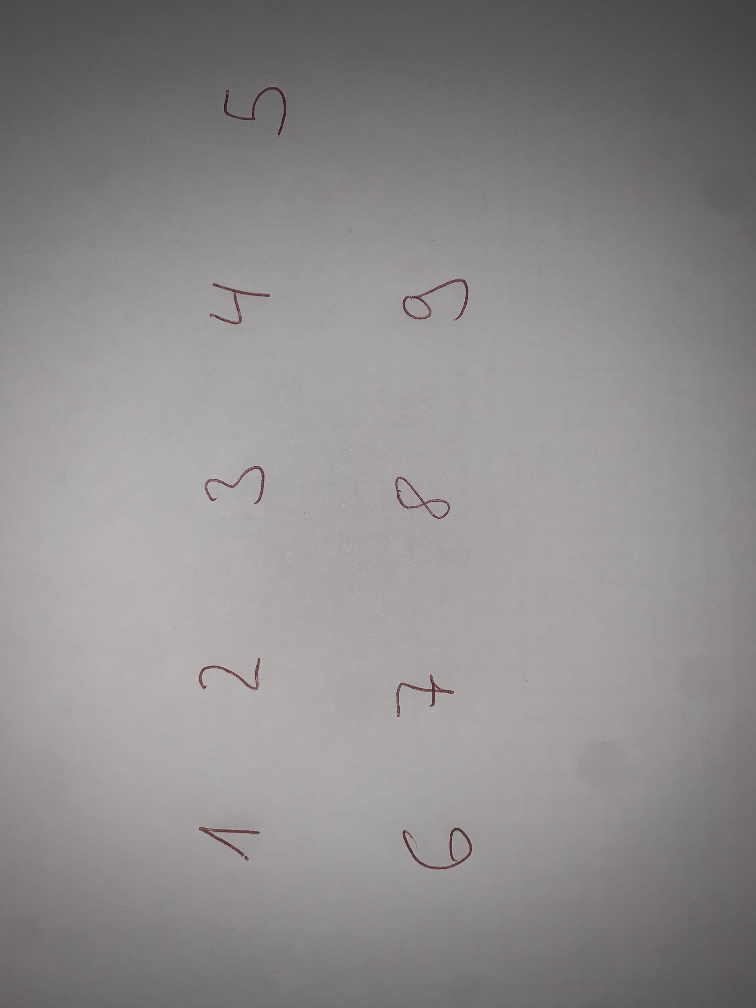

In [5]:
without_grid = cv2.imread("/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/04. Kernels, callbacks and thresholding/img/without_grid.jpg")
without_grid_sm = cv2.resize(without_grid, (int(without_grid.shape[1]/4), int(without_grid.shape[0]/4)))
fig = px.imshow(without_grid_sm)
fig.show()

In [84]:
# to sort counters from left to right
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 5:
        M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))

In [87]:
#converting to gray scale
gray=cv2.cvtColor(without_grid_sm,cv2.COLOR_BGR2GRAY)

#applying canny edge detection
edged = cv2.Canny(gray, 50, 250)

dil = cv2.dilate(edged, (9,9), iterations=1)

#finding contours
cnts, _ = cv2.findContours(dil.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c) 
    if w>30 and h>10:
        idx+=1
        new_img=without_grid_sm[y-40:y+h+40,x-20:x+w+20]
        #cropping imagesabs
        cv2.imwrite("./img/cropped/"+str(idx) + '.png', new_img)
print('Objects Cropped Successfully!')

Objects Cropped Successfully!


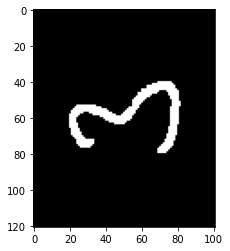

In [53]:
number = cv2.imread("./img/cropped/6.png")
number_gray=cv2.cvtColor(number,cv2.COLOR_BGR2GRAY)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the gray scale image
ret, number_bw = cv2.threshold(number_gray, 120, 255, cv2.THRESH_BINARY_INV)
number_sharp = cv2.filter2D(number_bw, -1, kernel_sharpening)
number_dil = cv2.dilate(number_sharp, None, iterations=1)

plt.imshow(number_dil, cmap="gray");

#number_sm = cv2.resize(number, (28, 28))
#plt.imshow(number_sm);

In [19]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

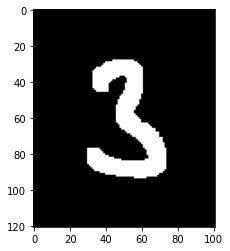

In [25]:
number_rot = rotate_image(number_dil, -90)
plt.imshow(number_rot, cmap="gray");

In [27]:
def crop_image(image, w, h):
    center = tuple(np.array(image.shape[1::-1]) / 2)
    print(center)
    x = center[0] - w/2
    y = center[1] - h/2

    crop_img = image[int(y):int(y+h), int(x):int(x+w)]
    return crop_img

(50.5, 60.5)


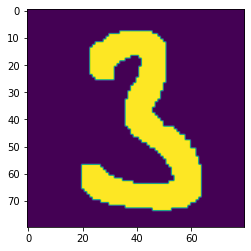

In [28]:
number_crop = crop_image(number_rot, 80, 80)
plt.imshow(number_crop)

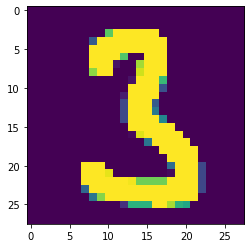

In [29]:
number_sm = cv2.resize(number_crop, (28, 28))
plt.imshow(number_sm);

### Prepare the image for keras prediction

In [84]:
test_image = number_sm.reshape(1,28,28,1)

In [85]:
test_image = (test_image[...,::-1].astype(np.float32)) / 255.0 

In [86]:
test_image.shape

(1, 28, 28, 1)

In [78]:
def prep_image(path):
    image = cv2.imread(path)
    image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, image_bw = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY_INV)
    image_dil = cv2.dilate(image_bw, None, iterations=3)
    
    # rotate image
    angle = -90
    image_center = tuple(np.array(image_dil.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    image_rot = cv2.warpAffine(image_dil, rot_mat, image_dil.shape[1::-1], flags=cv2.INTER_LINEAR)

    # center crop
    w = 80
    h = 80
    
    center = tuple(np.array(image_rot.shape[1::-1]) / 2)
    
    x = center[0] - w/2
    y = center[1] - h/2

    image_crop = image_rot[int(y):int(y+h), int(x):int(x+w)]
    
    # resize
    image_sm = cv2.resize(image_crop, (28, 28))
     
    # reshape 
    image_reshaped = image_sm.reshape(1,28,28,1)
    
    test_image = (image_reshaped[...,::-1].astype(np.float32)) / 255.0 
    
    return test_image
    

In [63]:
image1 = cv2.imread("./img/cropped/1.png")
image2 = cv2.imread("./img/cropped/2.png")
image3 = cv2.imread("./img/cropped/3.png")
image4 = cv2.imread("./img/cropped/4.png")
image5 = cv2.imread("./img/cropped/5.png")
image6 = cv2.imread("./img/cropped/6.png")
image7 = cv2.imread("./img/cropped/7.png")
image8 = cv2.imread("./img/cropped/8.png")
image9 = cv2.imread("./img/cropped/9.png")

In [79]:
test_image1 = prep_image("./img/cropped/1.png")
test_image2 = prep_image("./img/cropped/2.png")
test_image3 = prep_image("./img/cropped/3.png")
test_image4 = prep_image("./img/cropped/4.png")
test_image5 = prep_image("./img/cropped/5.png")
test_image6 = prep_image("./img/cropped/6.png")
test_image7 = prep_image("./img/cropped/7.png")
test_image8 = prep_image("./img/cropped/8.png")
test_image9 = prep_image("./img/cropped/9.png")

In [80]:
images = [image1,image2, image3, image4, image5, image6, image7, image8, image9]
test_images = [test_image1, test_image2, test_image3, test_image4, test_image5, test_image6, test_image7, test_image8, test_image9]

## Train keras model on MNIST dataset

In [72]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [73]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [74]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model.save('./model')

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 21s 382us/sample - loss: 0.3767 - accuracy: 0.8844 - val_loss: 0.0850 - val_accuracy: 0.9757
Epoch 2/15
54000/54000 [==============================] - 20s 372us/sample - loss: 0.1152 - accuracy: 0.9647 - val_loss: 0.0578 - val_accuracy: 0.9852
Epoch 3/15
54000/54000 [==============================] - 21s 383us/sample - loss: 0.0877 - accuracy: 0.9730 - val_loss: 0.0480 - val_accuracy: 0.9882
Epoch 4/15
54000/54000 [==============================] - 21s 394us/sample - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.0438 - val_accuracy: 0.9883
Epoch 5/15
54000/54000 [==============================] - 21s 394us/sample - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 6/15
54000/54000 [==============================] - 21s 387us/sample - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0362 - val_accuracy: 0.9912
Epoch 7/15
54000/54000 [=====================

In [58]:
model = keras.models.load_model('./model/')

In [45]:
preds = model.predict(test_image2)
preds_labels  = np.argmax(preds, axis=1) # Class probs to label

In [81]:
preds_labels = []

for i in test_images:
    preds = model.predict(i)
    label = np.argmax(preds, axis=1)
    preds_labels.append(label[0])

In [82]:
preds_labels

[6, 1, 7, 2, 8, 3, 4, 3, 5]

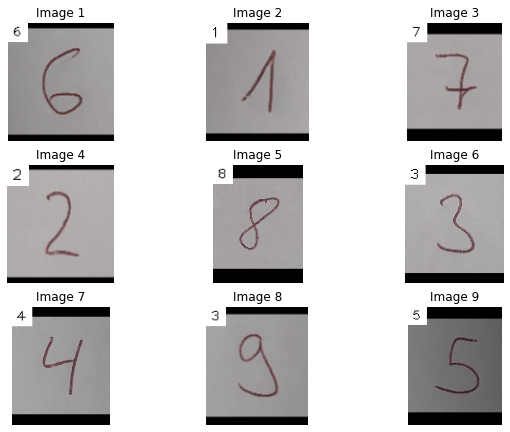

In [83]:
fig = plt.figure(figsize=(10, 10)) 
rows = 4
columns = 3

for i in range(0,9):
    image = rotate_image(images[i], -90)
    image = cv2.rectangle(image, (0,0), (20, 20), (255, 255, 255), -1)
    image = cv2.putText(image, f"{preds_labels[i]}", (4, 15), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0), 1)


    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(image)
    plt.axis('off') 
    plt.title(f"Image {i+1}") 
  
plt.show();